In [1]:
import os 
import numpy as np
import iris   

import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
PATH = os.path.join(os.getcwd(), "precip.mon.mean.nc")

In [3]:
cube = iris.load_cube(PATH)

In [4]:
print(cube)

Average Monthly Rate of Precipitation / (mm/day) (time: 492; latitude: 72; longitude: 144)
     Dimension coordinates:
          time                                        x              -              -
          latitude                                    -              x              -
          longitude                                   -              -              x
     Attributes:
          Conventions: COARDS
          References: https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
          actual_range: [ 0.   59.08]
          data_modified: 2020-01-10
          dataset: CPC Merged Analysis of Precipitation Standard
          dataset_title: CPC Merged Analysis of Precipitation
          date_modified: 26 Feb 2019
          documentation: https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
          history: update 01/2020 V2001
          least_significant_digit: 2
          level_desc: Surface
          parent_stat: Mean
          platform: Analyses
          p

In [5]:
print(cube.shape)
print(cube.ndim)
print(type(cube.data))

(492, 72, 144)
3
<class 'numpy.ma.core.MaskedArray'>


In [6]:
print(cube.standard_name)
print(cube.long_name)
print(cube.var_name)
print(cube.name())

None
Average Monthly Rate of Precipitation
precip
Average Monthly Rate of Precipitation


In [7]:
print(cube.units)
print(cube.data.max())

mm/day
59.08


In [8]:
time = cube.coord('time')
print(time[:4])
print(time[-4:])

DimCoord([1979-01-01 00:00:00, 1979-02-01 00:00:00, 1979-03-01 00:00:00,
       1979-04-01 00:00:00], standard_name='time', calendar='gregorian', long_name='Time', var_name='time', attributes={'actual_range': array([1569072., 1927728.]), 'avg_period': '0000-01-00 00:00:00', 'delta_t': '0000-01-00 00:00:00'})
DimCoord([2019-09-01 00:00:00, 2019-10-01 00:00:00, 2019-11-01 00:00:00,
       2019-12-01 00:00:00], standard_name='time', calendar='gregorian', long_name='Time', var_name='time', attributes={'actual_range': array([1569072., 1927728.]), 'avg_period': '0000-01-00 00:00:00', 'delta_t': '0000-01-00 00:00:00'})


In [9]:
lat = cube.coord('latitude')
long = cube.coord("longitude")
print(lat)
print(long)

DimCoord(array([ 88.75,  86.25,  83.75,  81.25,  78.75,  76.25,  73.75,  71.25,
        68.75,  66.25,  63.75,  61.25,  58.75,  56.25,  53.75,  51.25,
        48.75,  46.25,  43.75,  41.25,  38.75,  36.25,  33.75,  31.25,
        28.75,  26.25,  23.75,  21.25,  18.75,  16.25,  13.75,  11.25,
         8.75,   6.25,   3.75,   1.25,  -1.25,  -3.75,  -6.25,  -8.75,
       -11.25, -13.75, -16.25, -18.75, -21.25, -23.75, -26.25, -28.75,
       -31.25, -33.75, -36.25, -38.75, -41.25, -43.75, -46.25, -48.75,
       -51.25, -53.75, -56.25, -58.75, -61.25, -63.75, -66.25, -68.75,
       -71.25, -73.75, -76.25, -78.75, -81.25, -83.75, -86.25, -88.75],
      dtype=float32), standard_name='latitude', units=Unit('degrees'), long_name='Latitude', var_name='lat', attributes={'actual_range': array([ 88.75, -88.75], dtype=float32)})
DimCoord(array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,
        21.25,  23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,
        41.25,  43.75,

In [10]:
print(cube.has_lazy_data())

False


Average Monthly Rate of Precipitation / (mm/day) (latitude: 72; longitude: 144)
     Dimension coordinates:
          latitude                                        x              -
          longitude                                       -              x
     Scalar coordinates:
          time: 2004-01-01 00:00:00
     Attributes:
          Conventions: COARDS
          References: https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
          actual_range: [ 0.   59.08]
          data_modified: 2020-01-10
          dataset: CPC Merged Analysis of Precipitation Standard
          dataset_title: CPC Merged Analysis of Precipitation
          date_modified: 26 Feb 2019
          documentation: https://www.esrl.noaa.gov/psd/data/gridded/data.cmap.html
          history: update 01/2020 V2001
          least_significant_digit: 2
          level_desc: Surface
          parent_stat: Mean
          platform: Analyses
          precision: 2
          source: ftp ftp.cpc.ncep.noaa.gov pr

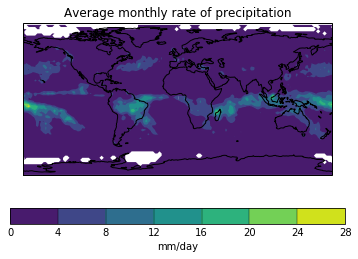

In [11]:
ts = cube[300, :, :]
print(ts)
qplt.contourf(ts)
plt.gca().coastlines()
iplt.show()

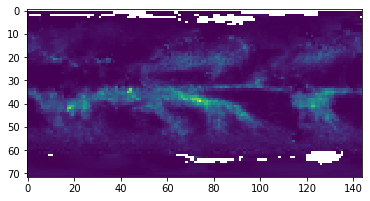

In [12]:
# convert to numpy type
n = cube.data
ts = n[300][:][:]
plt.imshow(ts)
plt.show()

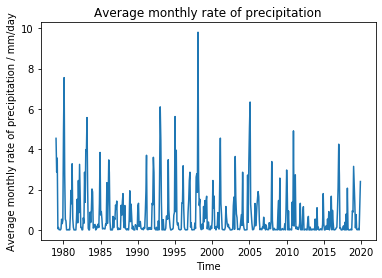

In [13]:
# plot precipitation in Los Angeles
lat_la = 34.05
long_la = -118.24 + 360
lat_cons = iris.Constraint(latitude = lambda x : lat_la-1.25 < x <lat_la+1.25)
long_cons = iris.Constraint(longitude = lambda x : long_la-1.25 < x <long_la+1.25)
rain_la = cube.extract(lat_cons & long_cons)
qplt.plot(rain_la)
qplt.show()

In [28]:
# convert data to numpy array for future usage
data = np.array(rain_la.data)
print(len(data))
print(type(data))

492
<class 'numpy.ndarray'>


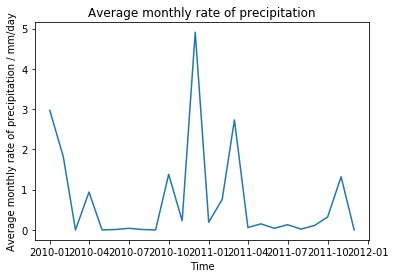

In [15]:
# plot rainfall data in a specific time range
from iris.time import PartialDateTime
time_start = PartialDateTime(year = 2010)
time_end = PartialDateTime(year = 2011)
part_rain_la = rain_la.extract(iris.Constraint(time = lambda x : time_start<=x<=time_end))
qplt.plot(part_rain_la)
qplt.show()

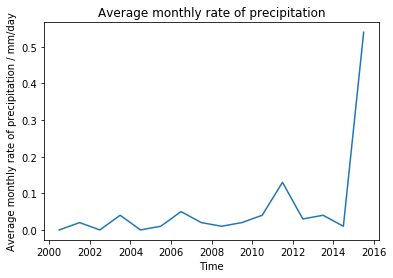

In [16]:
# plot rainfall data in a specific month
from iris.time import PartialDateTime
month_conf = PartialDateTime(month = 7)
time_start = PartialDateTime(year = 2000)
time_end = PartialDateTime(year = 2015)
part_rain_la = rain_la.extract(iris.Constraint(time=month_conf) & iris.Constraint(time = lambda x : time_start<=x<=time_end))
qplt.plot(part_rain_la)
qplt.show()

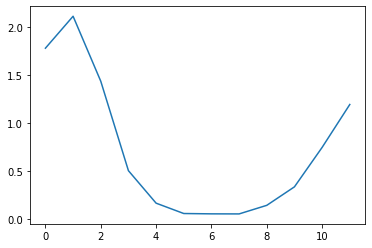

In [34]:
# get average precipitation per month
data.resize((41, 12))
average = np.average(data, axis = 0)
plt.plot(average)
plt.show()


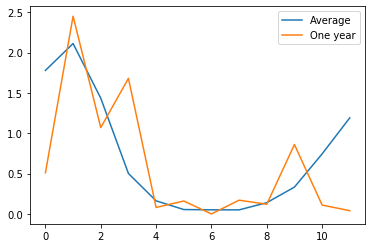

In [45]:
# compare data from a specific year with average
year_conf = PartialDateTime(year = 2000)
year_data = rain_la.extract(iris.Constraint(time=year_conf))
year_data = np.array(year_data.data)
plt.plot(average)
plt.plot(year_data)
plt.legend(("Average", "One year"))
plt.show()

In [46]:
import netCDF4

In [48]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'